<a href="https://colab.research.google.com/github/JFernando6321/computational-physics-projects/blob/main/perihelio_de_mercurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://ecfm.usac.edu.gt/sites/default/files/2019-02/cintillo.png" width="1000" alt="ecfm logo">
</center>


## Perihelio de mercurio ##



Autor: Julio Fernando Vicente Maldonado

Profesor: Msc. Juan Diego Chang

Curso: Física Computacional
## Objetivos para este notebook

1.  Realizar una función de Runge-Kutta con la fuerza de la ecuación 11.4.

2.  Calcular la órbita con estos valores y un ángulo $\theta$ entre el vector de posición de mercurio y el eje horizontal como función del tiempo.

3. Deducir a partir de estos resultados el valor de la cantidad de precesión para el valor $\alpha = 1.1 \times 10^{-8} UA ^2$




La precesión es un fenómeno común en nuestra vide. El Objeto gira mientras gira alrededor de un eje fijo. Este es un experimento interesante. Debemos saber que la mayoría de los planetas tiene órbitas que son casi circulares. los plantes cuyas órbitas se desvían más de ircular son Mercurio y Plutón.
Para Merurio la orientación de los ejes de la elipse que describe suórbita giran con el tiempo. **Diferentes planetas tienen diferente magnitud de esta precesión** esta es de aproximadamente 43 segundos de arco por siglo.
 Esta curvatura puede ser aproximada por el efecto de otra fuerza que produce una fuerza total:
$
F = \frac{G M_\odot M_M }{r^2}(1+ \frac{\alpha }{r^2} ) \tag{11.4}
$
Con $\alpha = 1.1 \times 10^{-8} AU ^2$

Teniendo esto encuenta vamos a hacer el primer apartado que nos dice:
1. Realizar una función de Runge-Kutta con la fuerza de la ecuación 11.4.

Definir también como posición inicial y velocidad inicial dada por:
\begin{equation*}
x_0 = (1+e)a, \quad y_0 =0 \\
v_0^x = 0, \quad v_0^y = \sqrt{\frac{GM_s}{a} \frac{1-e}{1+e} }  \tag{11.5}
\end{equation*}
Entonces, mercurio se encuentra aquí inicialmente en el punto más lejano del Sol ya que $a$ es el semieje mayor de mercurio $(a= 0.39 UA)$ y $e= 0.206$ su excentricidad y por lo tanto, la distancia $ea$ es la distancia entre el sol y el centro de la elipse.
El semieje menor está definido por $ b = a \sqrt{1-e^2} $. La velocidad inicial se calcula por la conservación del momentum angular y la conservación de la energía, entre el punto inicial y el punto (0,b)


In [2]:
# =====================================================================
# Implementamos una función de runge-kutta basado en luerza  de 11.4
# =====================================================================

import numpy as np
import matplotlib.pyplot as plt

#Consideramos las constantes:

G = 4*np.pi**2
Ms = 1
alpha = 0.0008 #El valor inicial
a = 0.39 #UA
e = 0.206
AU_to_km = 1.496e8 # Unidad astronómica en kilometros

# Definimos la funcion para la aceleracion

def aceleracion(x,y,alpha):
    r = np.sqrt(x**2 + y**2)
    factor = G*Ms/r**3
    correction =1 + alpha/r**2
    ax = -factor*x*correction
    ay = -factor*y*correction
    return ax, ay

#Ahora implementamos el metodo de runge kutta

def runge_kutta_4(alpha, x0, y0, vx0, vy0, dt, N):
  x= np.zeros(N)
  y= np.zeros(N)
  vx= np.zeros(N)
  vy= np.zeros(N)
  t= np.zeros(N)
  x[0] = x0
  y[0] = y0
  vx[0] = vx0
  vy[0] = vy0
  # Iteramos usando Runge kutta
  for i in range(N-1):
    ax1, ay1 = aceleracion(x[i], y[i], alpha)

    #Primera orden K1
    kx1 = vx[i]
    ky1 = vy[i]
    kvx1 = ax1
    kvy1 = ay1

    #Segunda orden K2
    ax2, ay2 = aceleracion(x[i] + 0.5*dt*kx1, y[i] + 0.5*dt*ky1, alpha)
    kx2 = vx[i] + 0.5*kvx1*dt
    ky2 = vy[i] + 0.5*kvy1*dt
    kvx2 = ax2
    kvy2 = ay2

    #Para K3
    ax3, ay3 = aceleracion(x[i] + 0.5*kx2*dt, y[i] +0.5*ky2*dt, alpha)
    kx3 = vx[i] + 0.5*kvx2*dt
    ky3 = vy[i] + 0.5*kvy2*dt
    kvx3 = ax3
    kvy3 = ay3

    #k4
    ax4, ay4 = aceleracion(x[i] + kx3*dt, y[i] + ky3*dt, alpha)
    kx4 = vx[i] + kvx3*dt
    ky4 = vy[i] + kvy3*dt
    kvx4 = ax4
    kvy4 = ay4

    #actualizamos las posiciones y velocidades:
    x[i+1] = x[i] +  (kx1+2*kx2+2*kx3+kx4)*dt/6
    y[i+1] = y[i] + (ky1+2*ky2+2*ky3+ky4)*dt/6
    vx[i+1] = vx[i] + (kvx1+2*kvx2+2*kvx3+kvx4)*dt/6
    vy[i+1] = vy[i] + (kvy1+2*kvy2+2*kvy3+kvy4)*dt/6
    t[i+1] = t[i] + dt
  return x, y, vx, vy, t


2.  Calcular la órbita con estos valores y un ángulo $\theta$ entre el vector de posición de mercurio y el eje horizontal como función del tiempo Calcular la distancia entre Mercurio y el Sol y su derivada en el tiempo dada por :

$
\frac{dr}{dt} = \frac{xv_x +y v_y}{ r}  \tag{11.6}
$
Esta derivada se anula cada vez que mercurio alcanza su punto más alejado del Solo o punto más cercano (el perihelio). Trazar el ángulo $\theta_p$ hecho entre el vector de posición de mercurio y su punto más alejado y el eje horizontal como función del tiempo. ¿ Qué se observa? Determinar la pendiente $\frac{d\theta_p}{dt } $ que es precisamente la cantidad de precesión del perihelio de mercurio para cada valor de $\alpha$ en el cuadro 2.1




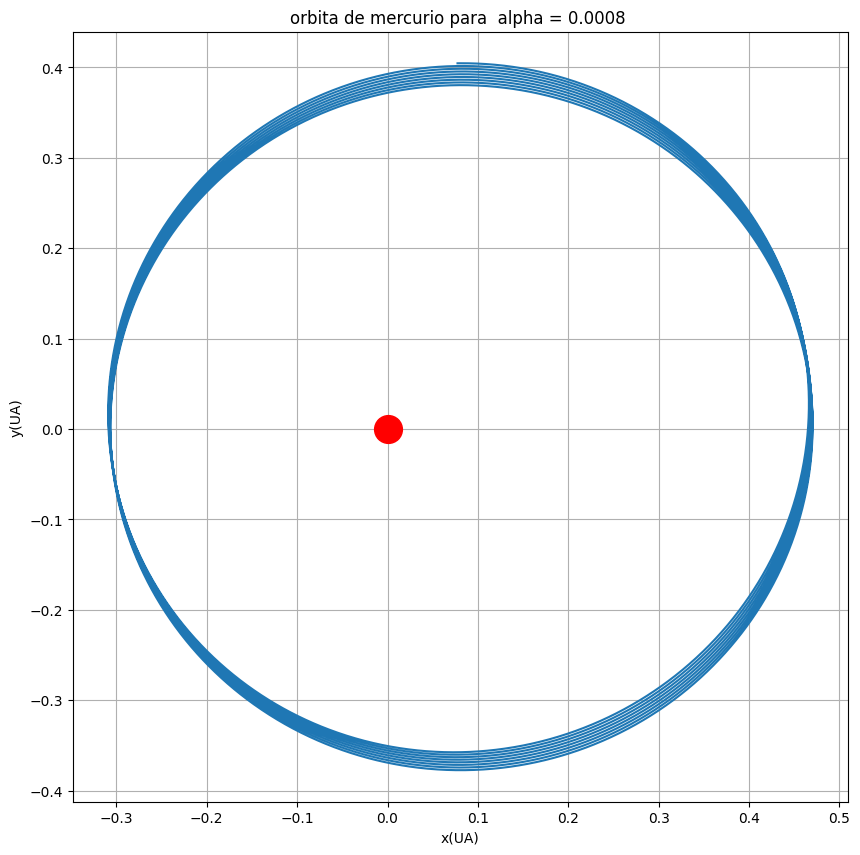

In [16]:
# =====================================================================
#                 calculo de la orbita
# =====================================================================
# tomamos las condiciones iniciales:
b = a*np.sqrt(1-e**2)
x0 = (1+e)*a
y0 = 0
vx0 = 0
vy0 = np.sqrt(G*Ms/a*(1-e)/(1+e))

#Los parametros conlos que trabajaremos

N = 20000 #Numero de pasos
dt = 0.0001 # Paso de tiempo

x, y, vx, vy, t = runge_kutta_4(alpha, x0, y0, vx0 ,vy0 , dt, N)

# Obtenemos la orbita que buscamos

plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel('x(UA)')
plt.ylabel('y(UA)')
plt.title('orbita de mercurio para  alpha = {} '.format(alpha))
plt.grid()
plt.axis('equal')
plt.plot([0],[0],'or',markersize=20)
plt.show()

Ahoa para la parte del angulo $\theta$ y la precesión del perihelio

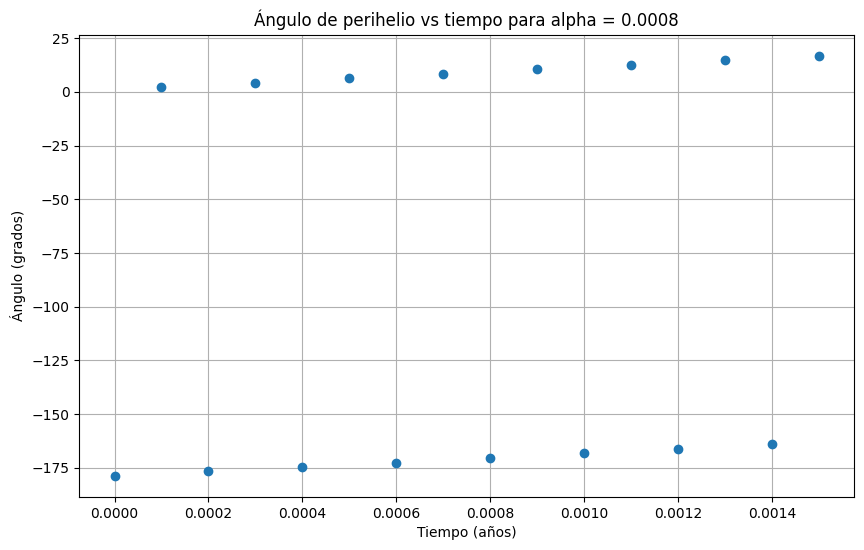

In [18]:
# definimos la función para calcular el angulo

def calcular_theta(x,y):
  return np.arctan2(y,x)

# ahora calculamos dr/dt
def calcular_dr_dt(x,y, vx, vy):
  r = np.sqrt(x**2 + y**2)
  dr_dt = (vx*x + vy*y)/r
  return dr_dt

# calculamos el angulo cuando dr/dt=0
theta_p = []
for i in range(1, N-1):
  drdt = calcular_dr_dt(x[i], y[i], vx[i], vy[i])
  if drdt*calcular_dr_dt(x[i-1], y[i-1], vx[i-1], vy[i-1]) < 0:
    theta_p.append(calcular_theta(x[i], y[i]))

#combertimos de radianes a grados
theta_p = np.array(theta_p)
theta_p_deg = np.degrees(theta_p)

#graficamos el ángulo como función del tiempo:
plt.figure(figsize=(10,6))
plt.plot(t[:len(theta_p_deg)], theta_p_deg, 'o' )
plt.xlabel('Tiempo (años)')
plt.ylabel('Ángulo (grados)')
plt.title('Ángulo de perihelio vs tiempo para alpha = {}'.format(alpha))
plt.grid()
plt.show()